## Lecture 1: Exercises
---

In [74]:
from numpy import heaviside, dot, insert,zeros,linspace
bit = [0,1] #2-bit inputs for gates

In [2]:
def neur(xlist,wlist):
    """
    Takes input data list x and weight list w, appends x[0]=1, 
    and computes a dot product s=x*w.
    
    -----
    Output: 1 if s>0, otherwise returns 0.
    """
    xlist.insert(0,1)
    s = dot(xlist,wlist)
    return int(heaviside(s, 0)) #Heavisidde at x=0 is set to zero.

### a gate realizing conjunction of multiple boolean variables

For a N-input AND gate, every output is 0 unless all the bits are 1.
* When all the bits are 0, we have 0 as an output, and the neuron cannot fire, i.e, the bias $w_0<0$ must be negative. Let's set $w_0=-1$. 
* The neuron only fires if all the bits are 1, which gives $w_0+w_1+...+w_N > 0$. If the weights are equal (say $w$), we get $w>(1/N)$.
* Therefore, a possible choice of the weight list is $w \in \{-1,\frac{1}{N},\frac{1}{N},...,\frac{1}{N}\}$

In [3]:
def neur3AND(p,q,r): #3-input AND gate
    return neur([p,q,r], [-1,0.34,0.34,0.34])

print('p q r p^q^r')
print()
for p in bit:
    for q in bit:
        for r in bit:
            print(p, q, r, neur3AND(p,q,r))

p q r p^q^r

0 0 0 0
0 0 1 0
0 1 0 0
0 1 1 0
1 0 0 0
1 0 1 0
1 1 0 0
1 1 1 1


In [4]:
def neur4AND(p,q,r,s): #4-input AND gate
    return neur([p,q,r,s], [-1,0.26,0.26,0.26,0.26])

print('p q r s Output=p^q^r^s')
print()
for p in bit:
    for q in bit:
        for r in bit:
            for s in bit:
                print(p, q, r, s, ' ', neur4AND(p,q,r,s))

p q r s Output=p^q^r^s

0 0 0 0   0
0 0 0 1   0
0 0 1 0   0
0 0 1 1   0
0 1 0 0   0
0 1 0 1   0
0 1 1 0   0
0 1 1 1   0
1 0 0 0   0
1 0 0 1   0
1 0 1 0   0
1 0 1 1   0
1 1 0 0   0
1 1 0 1   0
1 1 1 0   0
1 1 1 1   1


### gates NOT, NOR;

For NOT gate, we have i) $w_0>0$, and ii) $w_0+w_1 \le 0$. This gives $w_1\le -1$ if $w_0=1$.

In [5]:
def neurNOT(p): return neur([p], [1, -1.5])
print('p Output=NOT p')
print()
for p in bit:
    print(p, ' ', neurNOT(p))

p Output=NOT p

0   1
1   0


For NOR gate, the neuron should fire if all the bits are 0, i.e., $w_0>0$. If we take $w_0=1$, we have $w_1,w_2<-1$ from other conditions.

In [6]:
def neurNOR(p,q): return neur([p,q], [1, -1.5, -1.5])
print('p q Output=p NOR q')
print()
for p in bit:
    for q in bit:
        print(p, q, ' ', neurNOR(p,q))

p q Output=p NOR q

0 0   1
0 1   0
1 0   0
1 1   0


### gates OR, AND, NOT by composing NAND gates;

* OR gate: (p NAND p) NAND (q NAND q)
* AND gate: (p NAND q) NAND (p NAND q)
* NOT gate: p NAND p

In [7]:
def neurNAND(p,q): return neur([p,q],[1,-0.6,-0.6]) #Define the NAND gate

In [8]:
def neur_ORfromNAND(p,q): return neurNAND(neurNAND(p,p), neurNAND(q,q))
for p in bit:
    for q in bit:
        print(p,q,' ',neur_ORfromNAND(p,q))

0 0   0
0 1   1
1 0   1
1 1   1


In [9]:
def neur_ANDfromNAND(p,q): return neurNAND(neurNAND(p,q), neurNAND(p,q))
for p in bit:
    for q in bit:
        print(p,q,' ',neur_ANDfromNAND(p,q))

0 0   0
0 1   0
1 0   0
1 1   1


In [10]:
def neur_NOTfromNAND(p): return neurNAND(p,p)
for p in bit:
        print(p,' ',neur_NOTfromNAND(p))

0   1
1   0


### the half adder and full adder

* The simplest half adder construction has the XOR gate as sum, and the AND gate as carry.

In [11]:
def neurAND(p,q): return neur([p,q],[-1,.6,.6])
def neurOR(p,q):   return neur([p,q],[-1,1.2,1.2])
def neurXOR(p,q): return neurAND(neurNAND(p,q),neurOR(p,q))
def neur_halfAdder(p,q):
    C = neurAND(p,q) #carry
    S = neurXOR(p,q) #sum
    return [C, S]

print('p q    C  S')
for p in bit:
    for q in bit:
        print(p,q,' ',neur_halfAdder(p,q))

p q    C  S
0 0   [0, 0]
0 1   [0, 1]
1 0   [0, 1]
1 1   [1, 0]


* The full adder has three inputs $p,q,r$ with carry $C = (p \cdot q) + (r \cdot (p \bigoplus q))$ and sum $S = p \bigoplus q \bigoplus r$.

In [12]:
def neur_fullAdder(p, q, r):
    C = neurOR(neurAND(p,q), neurAND(r, neurXOR(p,q)))
    S = neurXOR(neurXOR(p,q), r) #XOR is associative
    return [C, S]

print('p q r    C  S')
for p in bit:
    for q in bit:
        for r in bit:
            print(p,q,r,' ',neur_fullAdder(p,q,r)) 

p q r    C  S
0 0 0   [0, 0]
0 0 1   [0, 1]
0 1 0   [0, 1]
0 1 1   [1, 0]
1 0 0   [0, 1]
1 0 1   [1, 0]
1 1 0   [1, 0]
1 1 1   [1, 1]


### Lecture 2: Exercises
---

In [13]:
import matplotlib.pyplot as plt
from cv2 import imread, bitwise_not
from numpy import outer, round

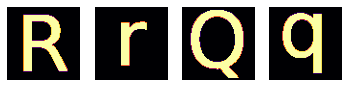

In [14]:
raw_R = imread('im_R.png', 0)
raw_r = imread('im_r.png', 0)
raw_Q = imread('im_Q.png', 0)
raw_q = imread('im_q.png', 0)

def make_binary(mat): #turns RGB into a binary image
    mat_reverted = bitwise_not(mat)
    return mat_reverted / 255.0

R = make_binary(raw_R)
r = make_binary(raw_r)
Q = make_binary(raw_Q)
q = make_binary(raw_q)

fig, axs = plt.subplots(1,4)
arr = [R,r,Q,q]
for i,ax in enumerate(axs):
    ax.set_axis_off()
    ax.imshow(arr[i], cmap='inferno')

In [15]:
fR = R.flatten(); fr = r.flatten(); fQ = Q.flatten(); fq = q.flatten()
#Define memory matrix
M = (outer(fR,fr)/dot(fr,fr) +
outer(fr,fR)/dot(fR,fR) +
outer(fQ,fq)/dot(fq,fq) +
outer(fq,fQ)/dot(fQ,fQ))

In [16]:
Rp = dot(M,fR).reshape(R.shape)
rp = dot(M,fr).reshape(r.shape)
Qp = dot(M,fQ).reshape(Q.shape)
qp = dot(M,fq).reshape(q.shape)

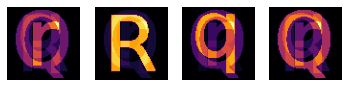

In [17]:
fig, axs = plt.subplots(1,4)
arrp = [Rp,rp,Qp,qp]
for i,ax in enumerate(axs):
    ax.set_axis_off()
    ax.imshow(arrp[i], cmap='inferno')

In [18]:
def filter_img(img, bias):
    imgf = zeros((len(img),len(img)))
    for i in range(len(img)):
        for j in range(len(img)):
            imgf[i,j] = neur( [img[i,j]], [-bias,1] ) 
    return imgf

def plot_myfilter(bias):
    fig, axs = plt.subplots(1,4)
    for i,ax in enumerate(axs):
        fig.text(0.45,0.65,'bias=%1.2f' %(bias),fontsize = 13)
        ax.set_axis_off()
        ax.imshow(filter_img(arrp[i], bias), cmap='inferno')

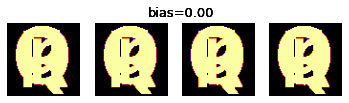

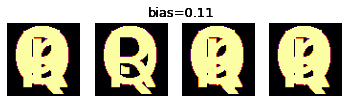

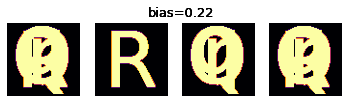

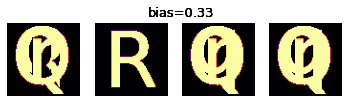

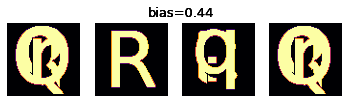

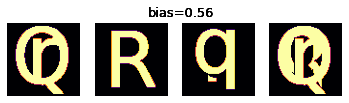

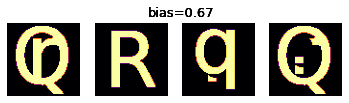

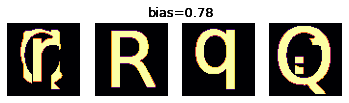

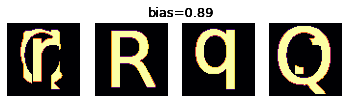

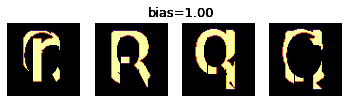

In [76]:
bias_list = linspace(0,1,10)
[plot_myfilter(bias) for bias in bias_list];